In [1]:
%load_ext autoreload
%autoreload 2

In [31]:
#third party
import astropy.units as u
import matplotlib.pyplot as plt
plt.style.use('/Users/juan/phd/matplotlib/jdefault.mplstyle')

import jax
import jax.numpy as jnp 
from jax._src.config import config
config.update("jax_enable_x64", True)

from dynamicAll import models

# Tutorial: Potentials

Almost all potentials are define through a set of scale density and radii (and a set of shape parameters if the parameterization calls for it) 

## Navaro-Frenk-White (NFW)

In [50]:
# model parameters
# NFW
rhos = 6.4e7 # scale density in Msun/kpc^3
rs   = 2.0   # scale radius in kpc

NFW = models.NFW(rhos,rs)

Depending on your needs it might be convenient to define your potential through a concentration parameter, c and $\rm M_{200}$

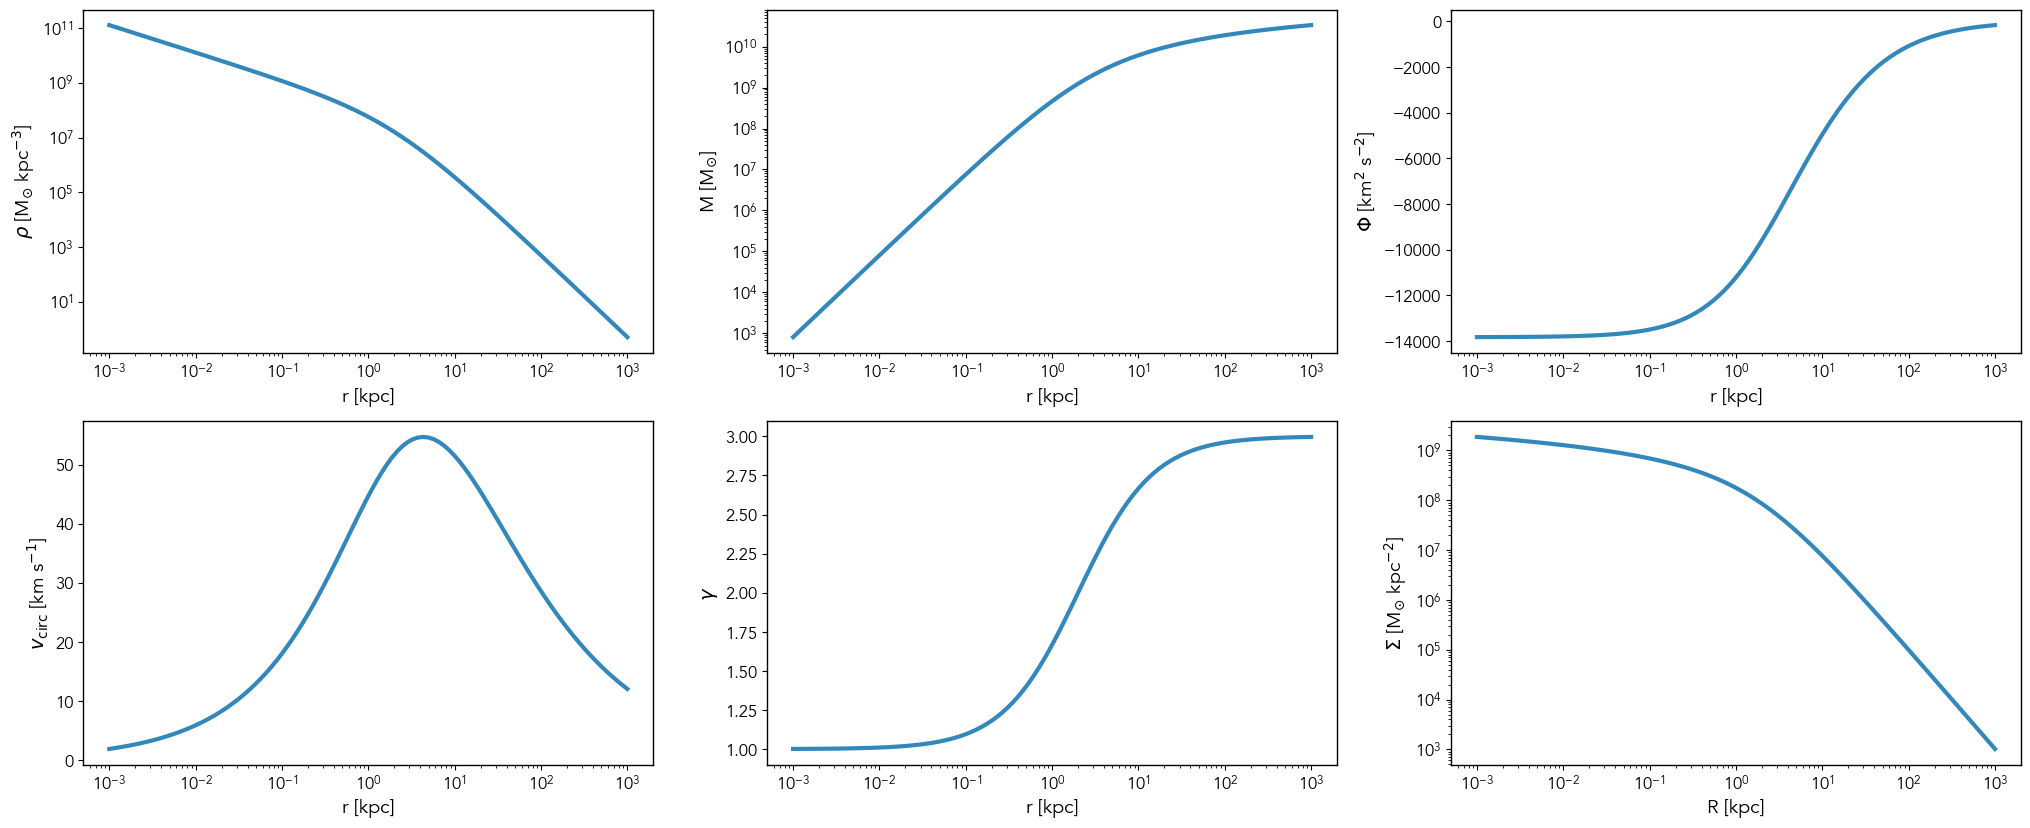

In [59]:
r = jnp.logspace(-3,3,100)
theta = (jnp.linspace(0,2,100)*u.deg).to(u.rad).value
fig,ax = plt.subplots(nrows=2,ncols=3,figsize=(25,10))
ax = ax.flatten()
ax[0].plot(r,NFW.density(r))
ax[1].plot(r,NFW.mass(r))
ax[2].plot(r,NFW.potential(r))
ax[3].plot(r,NFW.v_circ(r))
ax[4].plot(r,jax.vmap(NFW.gamma)(r)) # Note the vmap here cause autograd takes a scalar and returns a scalar
ax[5].plot(r,jax.vmap(NFW.project)(r))
# ax[4].plot(r,NFW.gamma(r))
ax[0].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);

ax[1].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'M [M$_{\odot}$]',
);
ax[2].set(
    xscale = 'log',
    # yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\Phi$ [km$^2$ s$^{-2}$]',
);
ax[3].set(
    xscale = 'log',
    # yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$v_{\rm circ}$ [km s$^{-1}$]',
);
ax[4].set(
    xscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\gamma$',
)
ax[5].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'R [kpc]',
    ylabel =r'$\Sigma$ [M$_{\odot}$ kpc$^{-2}$]',
);

If you are using these functions in order to build non-dynamicall stuff and want to use one or more of these functions, you should instead use the "Internal" functions which accept parameters.

They'll behave exactly the same way, but will require you to pass in the parameters to every function

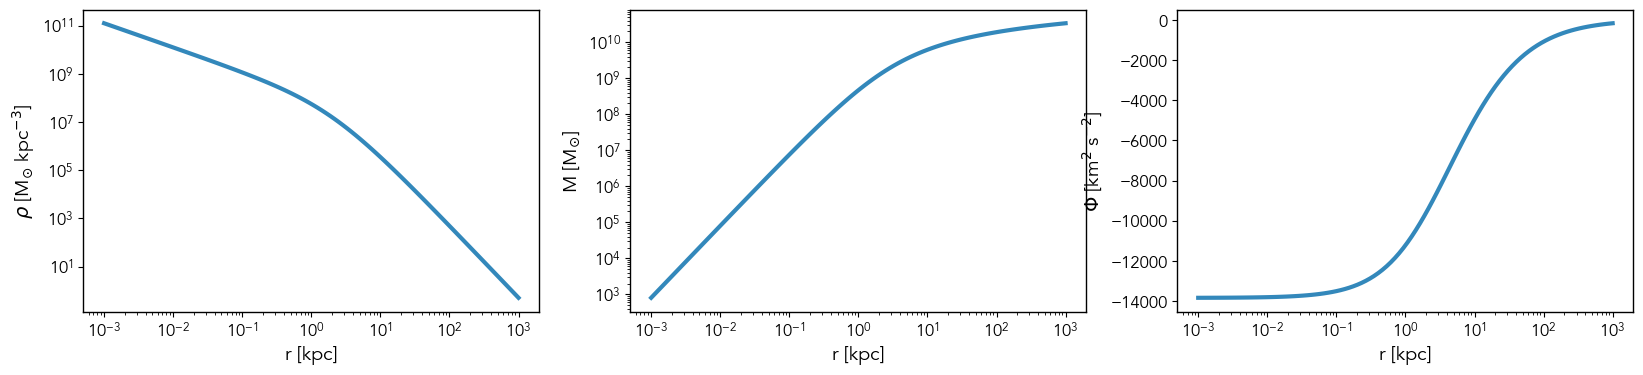

In [36]:
fig,ax = plt.subplots(ncols=3,figsize=(20,4))
ax = ax.flatten()
r = jnp.logspace(-3,3,100)
ax[0].plot(r,NFW._density(r,rhos,rs))
ax[1].plot(r,NFW._mass(r,rhos,rs))
ax[2].plot(r,NFW._potential(r,rhos,rs))
ax[0].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);
ax[1].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'M [M$_{\odot}$]',
);
ax[2].set(
    xscale = 'log',
    # yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\Phi$ [km$^2$ s$^{-2}$]',
);

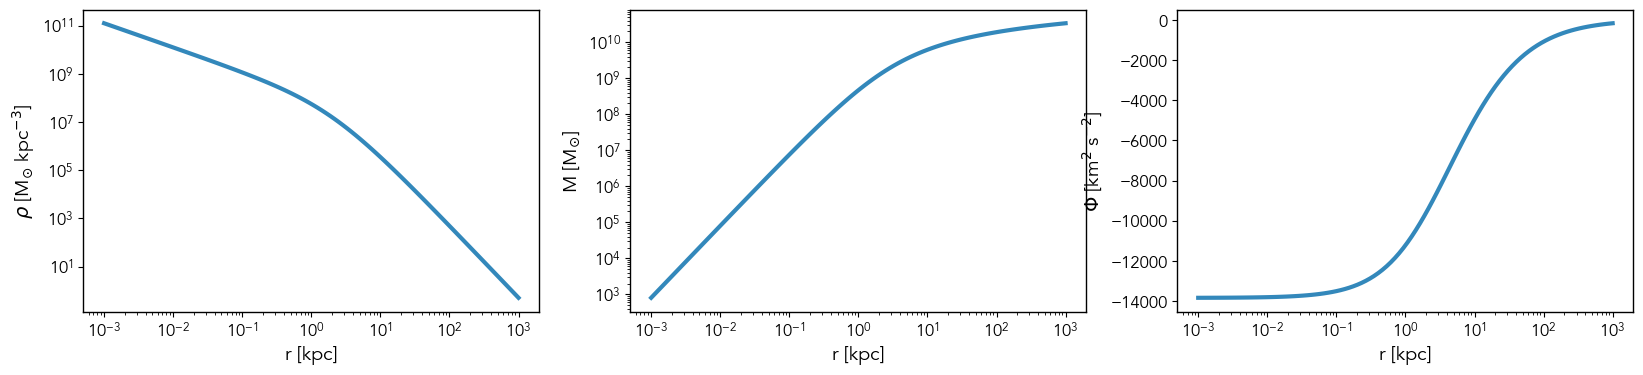

In [61]:
param_dict = {'rs':2.0,'rhos': 6.4e7}
fig,ax = plt.subplots(ncols=3,figsize=(20,4))
ax = ax.flatten()
r = jnp.logspace(-3,3,100)
ax[0].plot(r,NFW._density(r,**param_dict))
ax[1].plot(r,NFW._mass(r,**param_dict))
ax[2].plot(r,NFW._potential(r,**param_dict))
ax[0].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);
ax[1].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'M [M$_{\odot}$]',
);
ax[2].set(
    xscale = 'log',
    # yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\Phi$ [km$^2$ s$^{-2}$]',
);

## Hernquist-Zhao

For this case, every function (except the density) is calculated numerically.
We'll be careful to always compare this potential to the NFW to test the accuracy of the numerical integration
(We find pretty good agreement.)

In [19]:
rhos = 6.4e7 # scale density in Msun/kpc^3
rs   = 1.0   # scale radius in kpc
a    = 1 
b    = 1 
c    = 3 

Hzhao = models.HernquistZhao(rhos,rs,a,b,c)

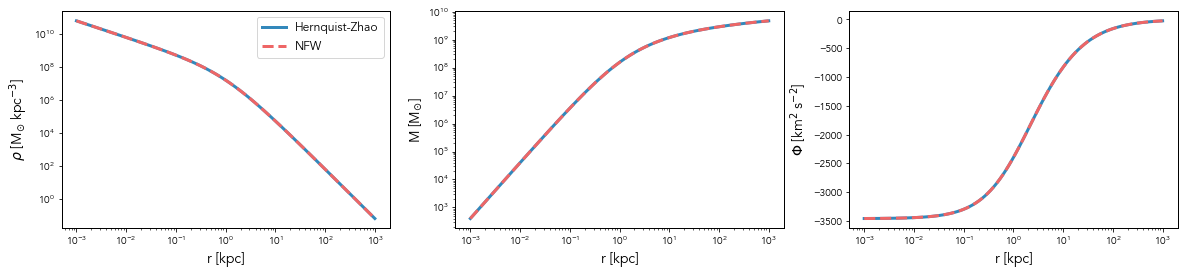

In [20]:
fig,ax = plt.subplots(ncols=3,figsize=(20,4))
r = jnp.logspace(-3,3,100)
ax[0].plot(r,Hzhao.density(r),
            label='Hernquist-Zhao')
ax[1].plot(r,Hzhao.mass(r),
            label='Hernquist-Zhao')
phi_HZ = jax.vmap(Hzhao.potential)(r)
ax[2].plot(r,phi_HZ,
            label='Hernquist-Zhao')


ax[0].plot(r,NFW._density(r,rhos,rs),
            linestyle='--',
            label='NFW')
ax[1].plot(r,NFW._mass(r,rhos,rs),
            linestyle='--',
            label='NFW')
ax[2].plot(r,NFW._potential(r,rhos,rs),
            linestyle='--',
            label='NFW')

ax[0].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);
ax[1].set(
    xscale = 'log',
    yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'M [M$_{\odot}$]',
);
ax[2].set(
    xscale = 'log',
    # yscale = 'log',
    xlabel = 'r [kpc]',
    ylabel =r'$\Phi$ [km$^2$ s$^{-2}$]',
)
ax[0].legend()

## Binned Power Laws

If you've used Gravsphere you may want to use the same scheme for the potential. Its essentially a broken power law with more breaks then usual and without the smooothing factor as in the Hernquist-Zhao Model.

$$
\rho(r) = \rho_{s} 
\begin{cases}
    \left(\frac{r}{0.25R_{1/2}}\right)^{\gamma} & r \lt 0.25 R_{1/2} \\
    \left(\frac{r}{0.5R_{1/2}}\right)^{\beta}
        \left(\frac{0.5 R_{1/2}}{0.25 R_{1/2}}\right)^{\beta} & 0.25 R_{1/2} \le r \lt 0.5 R_{1/2} \\
    \left(\frac{r}{R_{1/2}}\right)^{\delta}
        \left(\frac{R_{1/2}}{0.5 R_{1/2}}\right)^{\delta}
        \left(\frac{0.5 R_{1/2}}{0.25 R_{1/2}}\right)^{\beta} & 0.5 R_{1/2} \le r \lt R_{1/2} \\
    \left(\frac{r}{2R_{1/2}}\right)^{\sigma}
        \left(\frac{2 R_{1/2}}{R_{1/2}}\right)^{\sigma}
        \left(\frac{R_{1/2}}{0.5 R_{1/2}}\right)^{\delta}
        \left(\frac{0.5 R_{1/2}}{0.25 R_{1/2}}\right)^{\beta}  & R_{1/2} \le r \lt 2 R_{1/2} \\
    \left(\frac{r}{4R_{1/2}}\right)^{\alpha}
        \left(\frac{4 R_{1/2}}{2 R_{1/2}}\right)^{\alpha}
        \left(\frac{2 R_{1/2}}{R_{1/2}}\right)^{\sigma}
        \left(\frac{R_{1/2}}{0.5 R_{1/2}}\right)^{\delta}
        \left(\frac{0.5 R_{1/2}}{0.25 R_{1/2}}\right)^{\beta}  & r \ge 2 R_{1/2} \\
\end{cases}
$$
Where i've explicitly left terms uncanceled to show the reason they're there and to make it easier to show how to generalize it to more breaks inine with how the code is written.

In [21]:
binnedpl = models.PowerLaws(
                rhos = 1e7,
                R_half = 1.0,
                gamma = -1.0,
                beta  = -2.0,
                delta = -3.0,
                sigma = -4.0,
                alpha = -5.0)

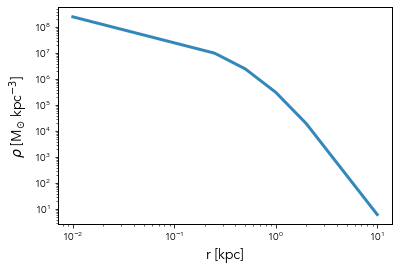

In [22]:
fig,ax = plt.subplots()
r = jnp.logspace(-2,1,100)
ax.plot(r,jax.vmap(jax.jit(binnedpl.density))(r))

ax.set(
    xscale='log',
    yscale='log',
    xlabel='r [kpc]',
    ylabel=r'$\rho$ [M$_{\odot}$ kpc$^{-3}$]',
);